<a href="https://colab.research.google.com/github/namespaceStedd/atanalize/blob/main/2.%20Data%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ с использованием `pandas`

Разведочный анализ данных (англ. exploratory data analysis, EDA) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации. Это понятие введено математиком Джоном Тьюки, который сформулировал цели такого анализа следующим образом:
- максимальное «проникновение» в данные,
- выявление основных структур,
- выбор наиболее важных переменных,
- обнаружение отклонений и аномалий,
- проверка основных гипотез,
- разработка начальных моделей.

Предварительная подготовка данных включает в себя очистку, отбор экземпляров, нормализацию, преобразование данных, выделение признаков, отбор признаков. Результатом предварительной обработки данных является конечный тренировочный набор.

Методы предварительной обработки данных:
- Очистка данных используется для обнаружения, исправления или удаления ошибочных записей в наборе данных.
- Нормализация данных используется для стандартизации диапазона значений независимых переменных или признаков данных (например, сведение к интервалам $[0, 1]$ или $[-1, +1]$).
- Преобразование данных используется для приведения данных в формат, удобный для обработки и анализа.
- Выделение признаков используется для преобразования входных данных в набор признаков, которые они хорошо представляют.
- Уплотнение данных используется для преобразования числовых данных в исправленный, упорядоченный и упрощённый вид. Это помогает уменьшить количество и/или размерность данных.

In [49]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn
seaborn.set();   # Устанавливаем seaborn по умолчанию для отрисовки графиков

Данные для исследования находятся вот [здесь](https://archive.ics.uci.edu/dataset/728/toxicity-2).

В состав предлагаемого датасета включены 2 набора данных: полный (`data`) и полезный (`Toxicity-13F`).

Для повторения работы с библиотекой `pandas`, визуализации данных и обучения основам разведочного анализа мы будем работать с полезным набором данных (`Toxicity-13F`).

In [50]:
def optional_import(case, processed):
  if case == 1:
    file = '1-pXQLNrBueN8opV2DLScuPgc3ICyx1bXRISw_XMx4ao' if processed else '1pdvn2vfbOcFS5MOL5oezEaswwiwqKitkJ0sTLh8XTXo';
    url = 'https://docs.google.com/spreadsheets/d/' + file + '/export?format=csv';
    return pandas.read_csv(url);
  else:
    file = 'Toxicity-13F.csv' if processed else 'data.csv';
    from google.colab import drive
    drive.mount('/content/gdrive/')
    return pandas.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Toxicity/Data/' + file);


# Опционально выбираем, как хотим импортировать:
# 1 - по ссылке на Google Spreadsheets
# 0 - прямым импортом с Google Drive
# True - использовать предобработанный файл (13 показателей ;) )
# False - использовать оригинальный (1203 показателя !!!)
toxicity = optional_import(1, True);
toxicity

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.6305,-0.1231,-3.1521,-2.9706,71.9807,2.4269,2.0708,1,1.0932,0.7954,2.8103,-4.3924,0.7136,NonToxic
167,33.1806,-0.0486,-7.2825,-4.0095,125.0777,3.0040,2.0701,3,1.0687,0.9850,3.2560,-4.4435,1.6616,NonToxic
168,28.3570,-0.0726,8.2017,-3.2338,133.7697,3.2468,1.9242,2,1.3249,0.9103,3.2822,-5.5907,1.9339,NonToxic
169,26.4286,0.0420,-32.5992,-7.0649,144.0674,3.2089,1.9162,4,1.3001,1.2687,3.2904,-3.5370,2.0526,Toxic


<b> Почему мы выбрали упрощённый файл? </b> <br>
<i> Потому что работать с файлом в 1203 показателя будет проблематично, ведь избыточность данных может давать неверные прогнозы... </i> <br> <br>
<b> Комментарий создателей: </b> <br>
<i> The data consists a complete set of 1203 molecular descriptors and needs feature selection before classification since some of the features are redundant. We used Recursive Feature Elimination together with Decision Tree Classifier (DTC) to get the best set of molecular descriptors for DTC. Subsetted data with 13 features is included as supplementary file. </i> <br>

In [51]:
# Выведем шапку датасета
toxicity.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic


Описание полей предобработанного датасета:

1. **MDEC-23**: Молекулярный дескриптор, который описывает расстояние между всеми вторичными и третичными углеродными атомами (ед. длины).
1. **MATS2v**: Автокорреляция Морана 1-го лага, взвешенная по объёму Ван-дер-Ваальса.
1. **ATSC8s**: Центрированная автокорреляция 8-го лага по Брото-Мореау, взвешенная по I-состоянию (что бы это ни значило...).
1. **VE3_Dt**: Сумма логарифмических коэффициентов последнего собственного вектора (абсолютных значений) из матрицы обхода.
1. **CrippenMR**: Дескриптор молярной рефрактивности. Он используется для прогнозирования физико-химических параметров на основе вклада атомов, как описано в работе Уайлдмана и Криппена (1999).
1. **SpMax7_Bhe**: Дескриптор, который обозначает наибольшее абсолютное собственное значение модифицированной матрицы Бёрдена для n7, взвешенное по относительной электроотрицательности Сандерсона.
1. **SpMin1_Bhs**: Дескриптор, который представляет наименьшее абсолютное значение собственного числа модифицированной матрицы Бёрдена — n1, взвешенное по относительному I-состоянию.
1. **C1SP2**: Углерод Sp2, связанный с одним атомом углерода (Sp-2 гибридизация).
1. **GATS8e**: Дескриптор, который представляет собой автокорреляцию Гири с задержкой 8, взвешенную по атомной электроотрицательности Сандерсона.
1. **GATS8s**: Дескриптор, который измеряет качество связи между атомными зарядами двух атомов, расположенных на расстоянии 8 связей друг от друга. Он представляет собой автокорреляцию Гири с запаздыванием 8, взвешенную по I-состоянию.
1. **SpMax5_Bhv**: Дескриптор, который представляет наибольшее абсолютное значение 5-го собственного значения модифицированной матрицы Бёрдена с учётом относительных объёмов Ван-дер-Ваальса.
1. **VE3_Dzi**: Молекулярный дескриптор, который используется в исследованиях антипролиферативной активности производных фенилпиперазина против клеточных линий рака предстательной железы DU145.
1. **VPC-4**: Клетки-предшественники сосудов.
1. **Class**: Класс токсичность биологической сущности с данным геном.

Продолжаем исследовать обучающий набор данных. Посмотрим на общую статистику числовых данных.

Памятка по всяким непонятным терминам из предыдущего описания полей датасета:

1. **Автокорреляция** — это мера корреляции между значениями ряда с разницей во времени.
1. **Автокорреляция (Центрированная)** — это автокорреляция центрированного случайного процесса, то есть с удалённым средним значением. Также её называют автоковариацией.
1. **Автокорреляция Брото-Мореау** — это молекулярный дескриптор, который описывает, как свойство распределяется вдоль топологической структуры. Он рассчитывается на основе молекулярного графа путём суммирования произведений атомных весов терминальных атомов всех путей определённой длины (лаг).
1. **Автокорреляция (индекс) Гири** — это мера пространственной автокорреляции, показатель, позволяющий выявлять региональные кластеры. Это один из показателей общей пространственной корреляции, который вычисляется для выявления возможной пространственной зависимости
1. **Автокорреляция (индекс) Морана (Пространственная автокорреляция)** — это зависимость между показателями рассматриваемых географических единиц и соседних для них географических единиц.
1. **Антипролиферативное действие** — одно из важнейших свойств α/β-ИФН. Оно заключается в способности тормозить размножение нормальных и некоторых ти-пов опухолевых клеток. α-ИФН может воздействовать на развитие опухолей как прямо — путём ингибиро-вания пролиферации злокачественных клеток, так и косвенно — через усиление противоопухолевых им-мунных реакций.
1. **Арильная группа** — это функциональная группа, полученная из простого ароматического кольцевого соединения, в котором из кольца удалён один атом водорода.
1. **Валентность** — это способность атома образовывать некоторое количество химических связей с атомами других элементов.
1. **Гибридизация** — это процесс смешения разных по форме и энергии атомных орбиталей и образование равных по форме и энергии гибридных орбиталей. В результате гибридизации электронные орбитали изменяют свою форму, выравниваются и становятся одинаковыми (гибридными).
1. **Дескрипторы** — это структурные параметры и физико-химические свойства соединений, используемые в анализе.
1. **Интерфероны (ИФН)** — это группа белков, которые синтезируются клетками при защите от чужеродных агентов (вирусной инфекции, митогенного воздействия).
1. **Лаг** в биологической корреляции — это задержка во времени между коррелируемыми факторами.
1. **Матрица Бёрдена** — это симметричная матрица, которая используется в качестве дескриптора молекулярных свойств.
1. **Молекулярный дескриптор** — это конечный результат логико-математической процедуры, которая преобразует химическую информацию, закодированную в символическом представлении молекулы, в полезное число или результат некоторого стандартизированного эксперимента.
1. **Объёма газа в уравнение Ван-дер-Ваальса** — это молярный объём.
1. **Относительная электроотрицательность** — фундаментальное химическое свойство атома, количественная характеристика способности атома в молекуле смещать к себе общие электронные пары, то есть способность атомов притягивать к себе электроны других атомов.
1. **Пиперазиновое кольцо** — это органическое соединение, состоящее из шестичленного кольца, содержащего два атома азота в противоположных положениях.
1. **Производные** — это понятие математического анализа, которое характеризует скорость изменения функции по отношению к изменению независимой переменной. В биологии производная позволяет определить скорость размножения колонии микроорганизмов по известной зависимости численности популяции.
1. **Радикалы (свободные)** — это частицы (как правило, неустойчивые), содержащие один или несколько неспаренных электронов.
1. **Рефрактерность** — это состояние возбудимых образований после предшествующего возбуждения, характеризующееся снижением или отсутствием возбудимости.
1. **Фенилпиперазин** — это простое химическое соединение, имеющее фенильную группу, связанную с пиперазиновым кольцом.
1. **Фенильная группа (фенильное ядроо)** — одновалентная группа, одновалентный радикал бензола, C6H5−, простейшая из арильных групп.
1. **Шестичленное кольцо** — это кольцо, в котором четыре гетероатома. Примеры шестичленных колец: тетразин, карборазин.
1. **Электроотрицательность Сандерсона** — это подход к определению электроотрицательности, основанный на идее выравнивания электроотрицательностей атомов при образовании химической связи между ними.

Продолжаем исследовать обучающий набор данных. Посмотрим на общую статистику числовых данных.

In [52]:
# Статистика числовых данных
toxicity.describe()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
count,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,39.135014,-0.005382,-6.26847,-32.311274,146.236654,3.220797,2.049780,2.760234,1.093376,1.136377,3.425033,-23.920250,2.570757
std,10.086143,0.081755,30.05588,51.493985,26.937485,0.191441,0.085865,1.551412,0.455116,0.498322,0.199008,42.218482,0.851349
min,7.861200,-0.152700,-120.80360,-167.741600,0.000000,2.247100,1.870900,0.000000,0.207600,0.231900,2.503400,-159.179600,0.000000
25%,32.911850,-0.074050,-19.90235,-16.831150,137.735350,3.157700,1.988400,2.000000,0.840100,0.817600,3.334050,-14.401850,2.183700
50%,39.828400,-0.005500,-5.95120,-8.148000,150.502700,3.260100,2.045100,3.000000,1.042400,1.068100,3.457500,-7.053600,2.647200
75%,45.469500,0.039500,6.98885,-5.928400,162.921750,3.339450,2.088200,4.000000,1.258300,1.357500,3.549150,-4.702950,2.991850
max,65.256000,0.284900,93.50820,-2.067100,180.556500,3.464200,2.347500,8.000000,4.299900,4.223000,3.761600,0.000000,6.185400


**Описание показателей.**
1.   Count. В любом показателе одинаковое количество непустых значений, датасет цельный.
1.   Mean. У некоторых показателей даже среднее значение отрицательное. Математическое ожидание сильно варьируется между показателями.
1.   Новый пункт
1.   Std. Самое высокое среднеквадратическое отклонение у показателей 'ATSC8s', 'VE3_Dt', 'CrippenMR', и 'VE3_Dzi'.
1.   min. У некоторых величин минимальное значение сильно ниже нуля, по сравнению с максимальным.
1.   25%. Для всех данных процентиль-25% выглядит правдоподобно.
1.   50%. Медианное значение практически совпадает с математическим ожиданием. Так быть и должно для датасета с нечётным количеством данных.
1.   75%. Для всех данных процентиль-75% выглядит правдоподобно.
1.   max. У некоторых данных ('VE3_Dt') даже максимальное значение - отрицательное.


In [53]:
# Описание датасета
toxicity.describe(include=['O'])

,Class
count,171
unique,2
top,NonToxic
freq,115


Метод `describe` приводит общую статистику по конкретным полям таблицы. Но для полного представления о данных нужно знать типы полей, количество непустых записей и т.п.
<br>
Таким образом, на 171 штук данных приходится 2 уникальных, чаще всего класс токсичности - нетоксичный (NonToxic) в количестве 115 штук.

In [54]:
# Информация по полям датасета
toxicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MDEC-23     171 non-null    float64
 1   MATS2v      171 non-null    float64
 2   ATSC8s      171 non-null    float64
 3   VE3_Dt      171 non-null    float64
 4   CrippenMR   171 non-null    float64
 5   SpMax7_Bhe  171 non-null    float64
 6   SpMin1_Bhs  171 non-null    float64
 7   C1SP2       171 non-null    int64  
 8   GATS8e      171 non-null    float64
 9   GATS8s      171 non-null    float64
 10  SpMax5_Bhv  171 non-null    float64
 11  VE3_Dzi     171 non-null    float64
 12  VPC-4       171 non-null    float64
 13  Class       171 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.8+ KB


В датасете нет NULL-полей (Ура!)

## Заполнение пропусков

Очень важным шагом является обнаружение недостающих значений. На этом этапе анализа не обязательно заполнять недостающие значения, но нужно разобраться в их сущности, чтобы  в дальнейшем понять, как заполнить их.

In [55]:
# Есть ли пустые значения и сколько их по полям
toxicity.isnull().sum()

,0
MDEC-23,0
MATS2v,0
ATSC8s,0
VE3_Dt,0
CrippenMR,0
SpMax7_Bhe,0
SpMin1_Bhs,0
C1SP2,0
GATS8e,0
GATS8s,0


В данном датасете пропусков нет, но что, если бы они были?

In [56]:
# Получить список показателей в датасете
columns = list(toxicity.columns);
print(columns);

['MDEC-23', 'MATS2v', 'ATSC8s', 'VE3_Dt', 'CrippenMR', 'SpMax7_Bhe', 'SpMin1_Bhs', 'C1SP2', 'GATS8e', 'GATS8s', 'SpMax5_Bhv', 'VE3_Dzi', 'VPC-4', 'Class']


Заполнить пропуски в категориальных признаках можно следующими способами:
- Заменить пропущенное значение новой категорией "Неизвестно".
- Заменить пропущенное значение наиболее популярным значением.

Для числовых признаков можно использовать усечённое среднее или медиану.

Существует 3 вида пропусков: полностью случайные, случайные и неслучайные. Восстановить автоматически возможно (по крайней мере теоретически) только пропуски первого типа.

Попробуем заменить пропуски в поле Age. Сначала посмотрим подробнее на это поле.

In [57]:
# Описание конкретного поля
toxicity.CrippenMR.describe()

,CrippenMR
count,171.000000
mean,146.236654
std,26.937485
min,0.000000
25%,137.735350
50%,150.502700
75%,162.921750
max,180.556500


In [58]:
# Сортировка значений поля
toxicity['CrippenMR'].sort_values().unique()

array([  0.    ,  53.691 ,  67.9057,  68.636 ,  68.656 ,  69.4004,
        71.9807, 111.9477, 118.0314, 120.352 , 121.315 , 122.0813,
       122.4998, 123.0387, 123.845 , 124.6238, 125.0777, 127.1097,
       129.3109, 129.419 , 129.5627, 129.6942, 129.8004, 129.8947,
       130.4974, 130.5887, 130.8423, 131.2339, 132.2645, 133.2871,
       133.2928, 133.7697, 134.1382, 134.6085, 134.8915, 135.4757,
       135.6725, 135.6957, 136.091 , 137.4745, 137.6013, 137.607 ,
       137.8637, 138.144 , 138.1843, 138.7324, 138.8037, 138.85  ,
       139.0405, 139.659 , 140.1315, 140.3597, 140.4875, 140.502 ,
       141.6895, 141.9105, 142.3292, 142.6533, 142.8927, 143.1042,
       143.1954, 143.9222, 143.9512, 144.0674, 144.4535, 144.502 ,
       144.6195, 145.2085, 145.2756, 145.6294, 146.2045, 146.4845,
       146.7977, 146.861 , 146.964 , 147.0043, 147.3087, 147.7859,
       148.224 , 148.5679, 148.922 , 149.22  , 149.8797, 150.5027,
       150.8584, 151.053 , 151.4827, 151.6457, 151.7935, 152.0

Заменим пропуски на медианное значение.

In [59]:
# Замена пропусков на медианное значение
toxicity.CrippenMR = toxicity.CrippenMR.fillna(toxicity.CrippenMR.median());
toxicity.CrippenMR.describe()

,CrippenMR
count,171.000000
mean,146.236654
std,26.937485
min,0.000000
25%,137.735350
50%,150.502700
75%,162.921750
max,180.556500


Что касается всех остальных показателей, то их пустые значения можно заполнить с помощью функции.

In [60]:
# Функция заполнения всех пустых значений в датасете
def fill_nulls(data, y_field):
  # Получить список числовых показателей входных значений в датасете
  y_field = [ y_field ] if type(y_field) != list else y_field;   # Если выходные поля не список
  indicators = list(data.loc[ : , ~data.columns.isin(y_field)].select_dtypes(['number']).columns);   # Исключаем выходные и нечисловые поля
  # indicators = list(data.loc[ : , data.columns != y_field].select_dtypes(['number']).columns);
  print(indicators);

  for i in range(0, len(indicators)):
    cryteria = data[indicators[i]];   # Прямая замена для читаемости ;)
    cryteria.describe();   # Описание конкретного поля (по желанию, можно выводить на экран)
    cryteria.sort_values().unique();   # Сортировка значений поля
    data[indicators[i]] = cryteria;   # Обратная замена
    data[indicators[i]].describe();   # Описание заполненного поля (по желанию, можно выводить на экран)

  return data;


# Запуск заполнения пустых полей Токсичного города
toxicity = fill_nulls(toxicity, 'Class');
toxicity.describe()


['MDEC-23', 'MATS2v', 'ATSC8s', 'VE3_Dt', 'CrippenMR', 'SpMax7_Bhe', 'SpMin1_Bhs', 'C1SP2', 'GATS8e', 'GATS8s', 'SpMax5_Bhv', 'VE3_Dzi', 'VPC-4']


,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
count,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,39.135014,-0.005382,-6.26847,-32.311274,146.236654,3.220797,2.049780,2.760234,1.093376,1.136377,3.425033,-23.920250,2.570757
std,10.086143,0.081755,30.05588,51.493985,26.937485,0.191441,0.085865,1.551412,0.455116,0.498322,0.199008,42.218482,0.851349
min,7.861200,-0.152700,-120.80360,-167.741600,0.000000,2.247100,1.870900,0.000000,0.207600,0.231900,2.503400,-159.179600,0.000000
25%,32.911850,-0.074050,-19.90235,-16.831150,137.735350,3.157700,1.988400,2.000000,0.840100,0.817600,3.334050,-14.401850,2.183700
50%,39.828400,-0.005500,-5.95120,-8.148000,150.502700,3.260100,2.045100,3.000000,1.042400,1.068100,3.457500,-7.053600,2.647200
75%,45.469500,0.039500,6.98885,-5.928400,162.921750,3.339450,2.088200,4.000000,1.258300,1.357500,3.549150,-4.702950,2.991850
max,65.256000,0.284900,93.50820,-2.067100,180.556500,3.464200,2.347500,8.000000,4.299900,4.223000,3.761600,0.000000,6.185400


## Визуализация распределений и взаимосвязей

Поговорим о признаках, которые можно выделить при анализе этих данных. Из лекций вы знаете, что выделяют количественные (числовые), категориальные и бинарные признаки.

Разделите признаки по этим типам. Можно ли считать поле `Cabin` числовым признаком, если его даже нет в датасете?

Выделяют визуализацию по одному признаку и во взаимосвязи признаков.

В прошлом семестре (·3/2) мы учились пользоваться для визуализации библиотекой `matplotlib`. Построим гистограмму, демонстрирующую количество MDEC-23 в этом наборе данных.

Для визуализации данных существует огромное количество библиотек для Python. Одной из самых популярных является библиотека `seaborn`, которая, по сути, представляет собой надстройку над `matplotlib`.

(array([ 3.,  4.,  6., 15., 37., 42., 33., 22.,  5.,  4.]),
 array([ 7.8612 , 13.60068, 19.34016, 25.07964, 30.81912, 36.5586 ,
        42.29808, 48.03756, 53.77704, 59.51652, 65.256  ]),
 <BarContainer object of 10 artists>)

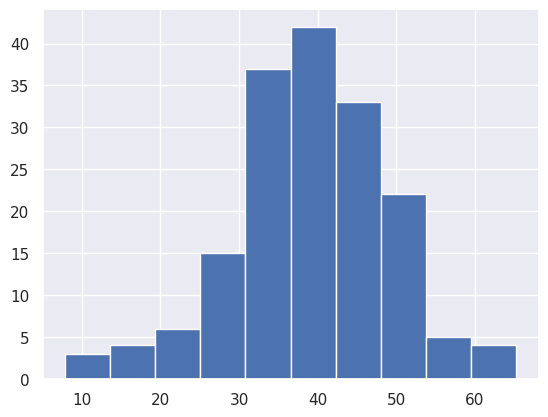

In [61]:
# Гистограмма
pyplot.hist(toxicity['MDEC-23'])

Показатель MDEC-23 имеет вид, приближённый к нормальному распределению (это не может не радовать!)

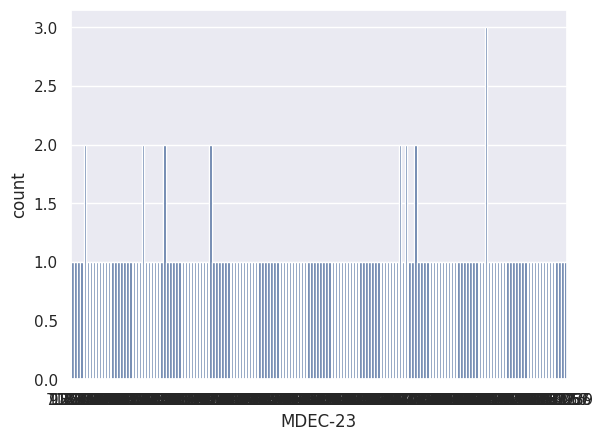

In [62]:
# График подсчёта
seaborn.countplot(x = toxicity['MDEC-23']);

Диаграмма нечитаема. Напишем функцию для дробления таких диаграмм на промежутки и применим её на практике.

In [63]:
# Функция подсчёта интервалов для красивых и приятных графиков!
def interval(column, count):
  interval = [];   # Создание списка

  max = toxicity[column].max();   # Максимальное значение по показателю
  min = toxicity[column].min();   # Минимальное значение по показателю
  ranger = (max - min) / (count + 1);   # Определение шага интервала

  for i in range(0, count):
    interval.append(min + ranger * i);   # Добавить минимальную величину и количество промежутков в зависимости от шага
  interval.append(max);

  return interval;


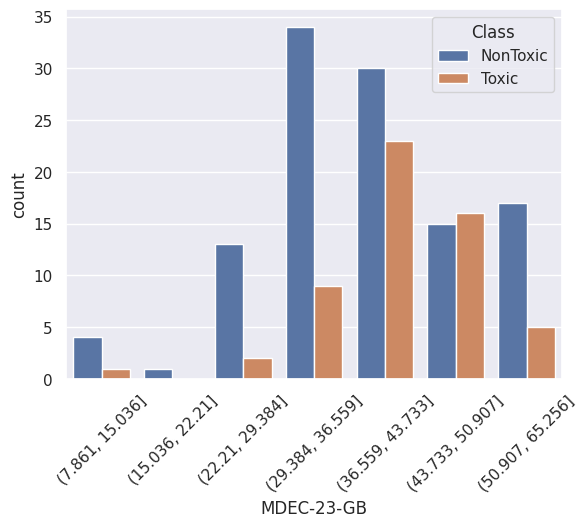

In [64]:
# График подсчёта
toxicity['MDEC-23-GB'] = pandas.cut(x=toxicity['MDEC-23'], bins=interval('MDEC-23', 7))
pyplot.xticks(rotation=45)
seaborn.countplot(data=toxicity, hue='Class', x='MDEC-23-GB');


По читаемому графику видно, что:
1.  Практически во всех случаях нетоксичных элементов больше, чем токсичных, кроме как на промежутке [43,733; 50,907].
1.  Больше всего процентного соотношения нетоксичного к токсичному:
    * На промежутке [15,036; 22,21] - вообще нет токсичных элементов.
    * На промежутке [22,21; 29,384] - больше всего нетоксичных к токсичным.
    * На промежутке [29,384; 36,559] - аналогично, больше всего нетоксичных к токсичным.
1.  Чаще всего, больше нетоксичных показателей в середине нормального распределения, и это нормально.

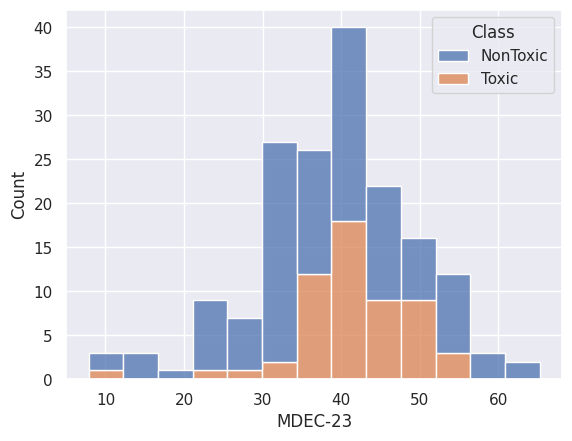

In [65]:
# График зависимости MDEC-23 от выходных данных.
seaborn.histplot(toxicity, x='MDEC-23', hue='Class', multiple='stack');

Наглядная демонстрация к предыдущим выводам, но с совмещением токсичных и нетоксичных столбцов.

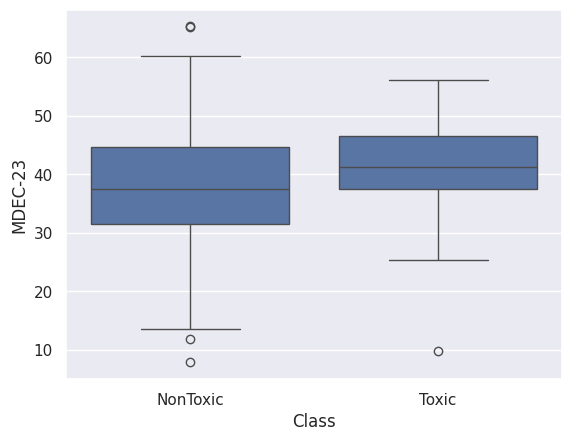

In [66]:
# График "Ящик с усами" для MDEC-23
seaborn.boxplot(data=toxicity, y='MDEC-23', x='Class');

По графику "Ящик с усами" видно, что подавляюшее большинство токсичных и нетоксичных значений сосредоточились ровно посередине у значений показателя 'MDEC-23'

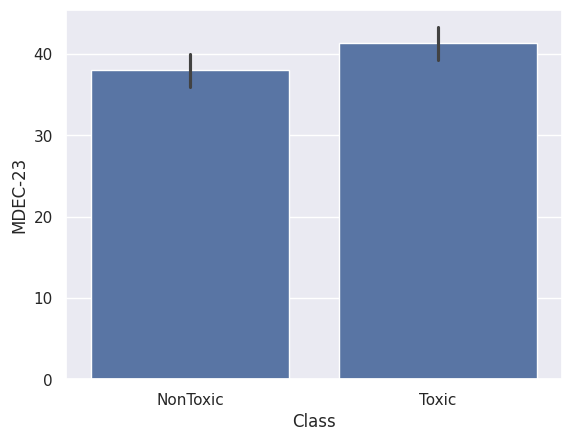

In [67]:
# Барный график для MDEC-23
seaborn.barplot(data=toxicity, x='Class', y='MDEC-23');

По графику "Ящик с усами" и Барному графику можно сказать, что чем выше показатель 'MDEC-23', тем выше вероятность, что полученное вещество будет токсичным. Даже 'NonToxic' у "Ящика с усами" сильно ниже выходит))

Попробуем совместить на одном графике 'MDEC-23' и другие показатели.

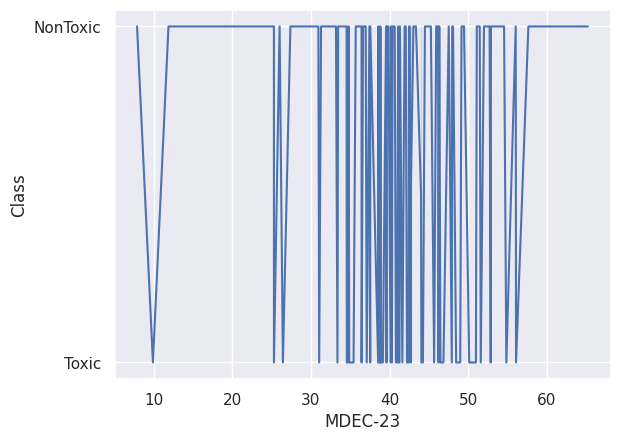

In [68]:
# Линейный график
seaborn.lineplot(data=toxicity, x='MDEC-23', y='Class');

Линейный график демонстрирует варьирование значений токсичности и нетокчисности элементов в завимисости от вещества MDEC-23.

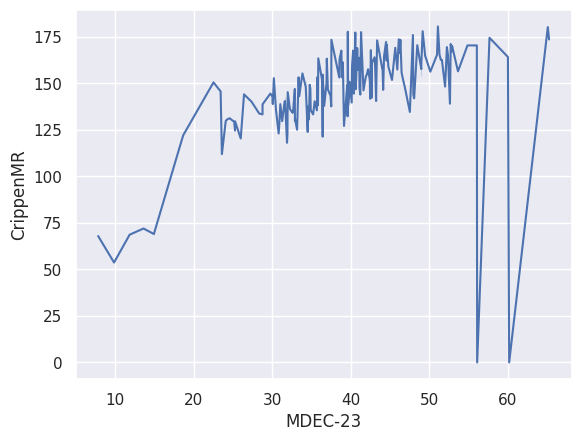

In [69]:
# Линейный график
seaborn.lineplot(data=toxicity, x='MDEC-23', y='CrippenMR');

Линейный график для показателей 'MDEC-23' и 'CrippenMR' показывает, что, чем больше численное значение одного из показателей, тем выше оно и у другого.

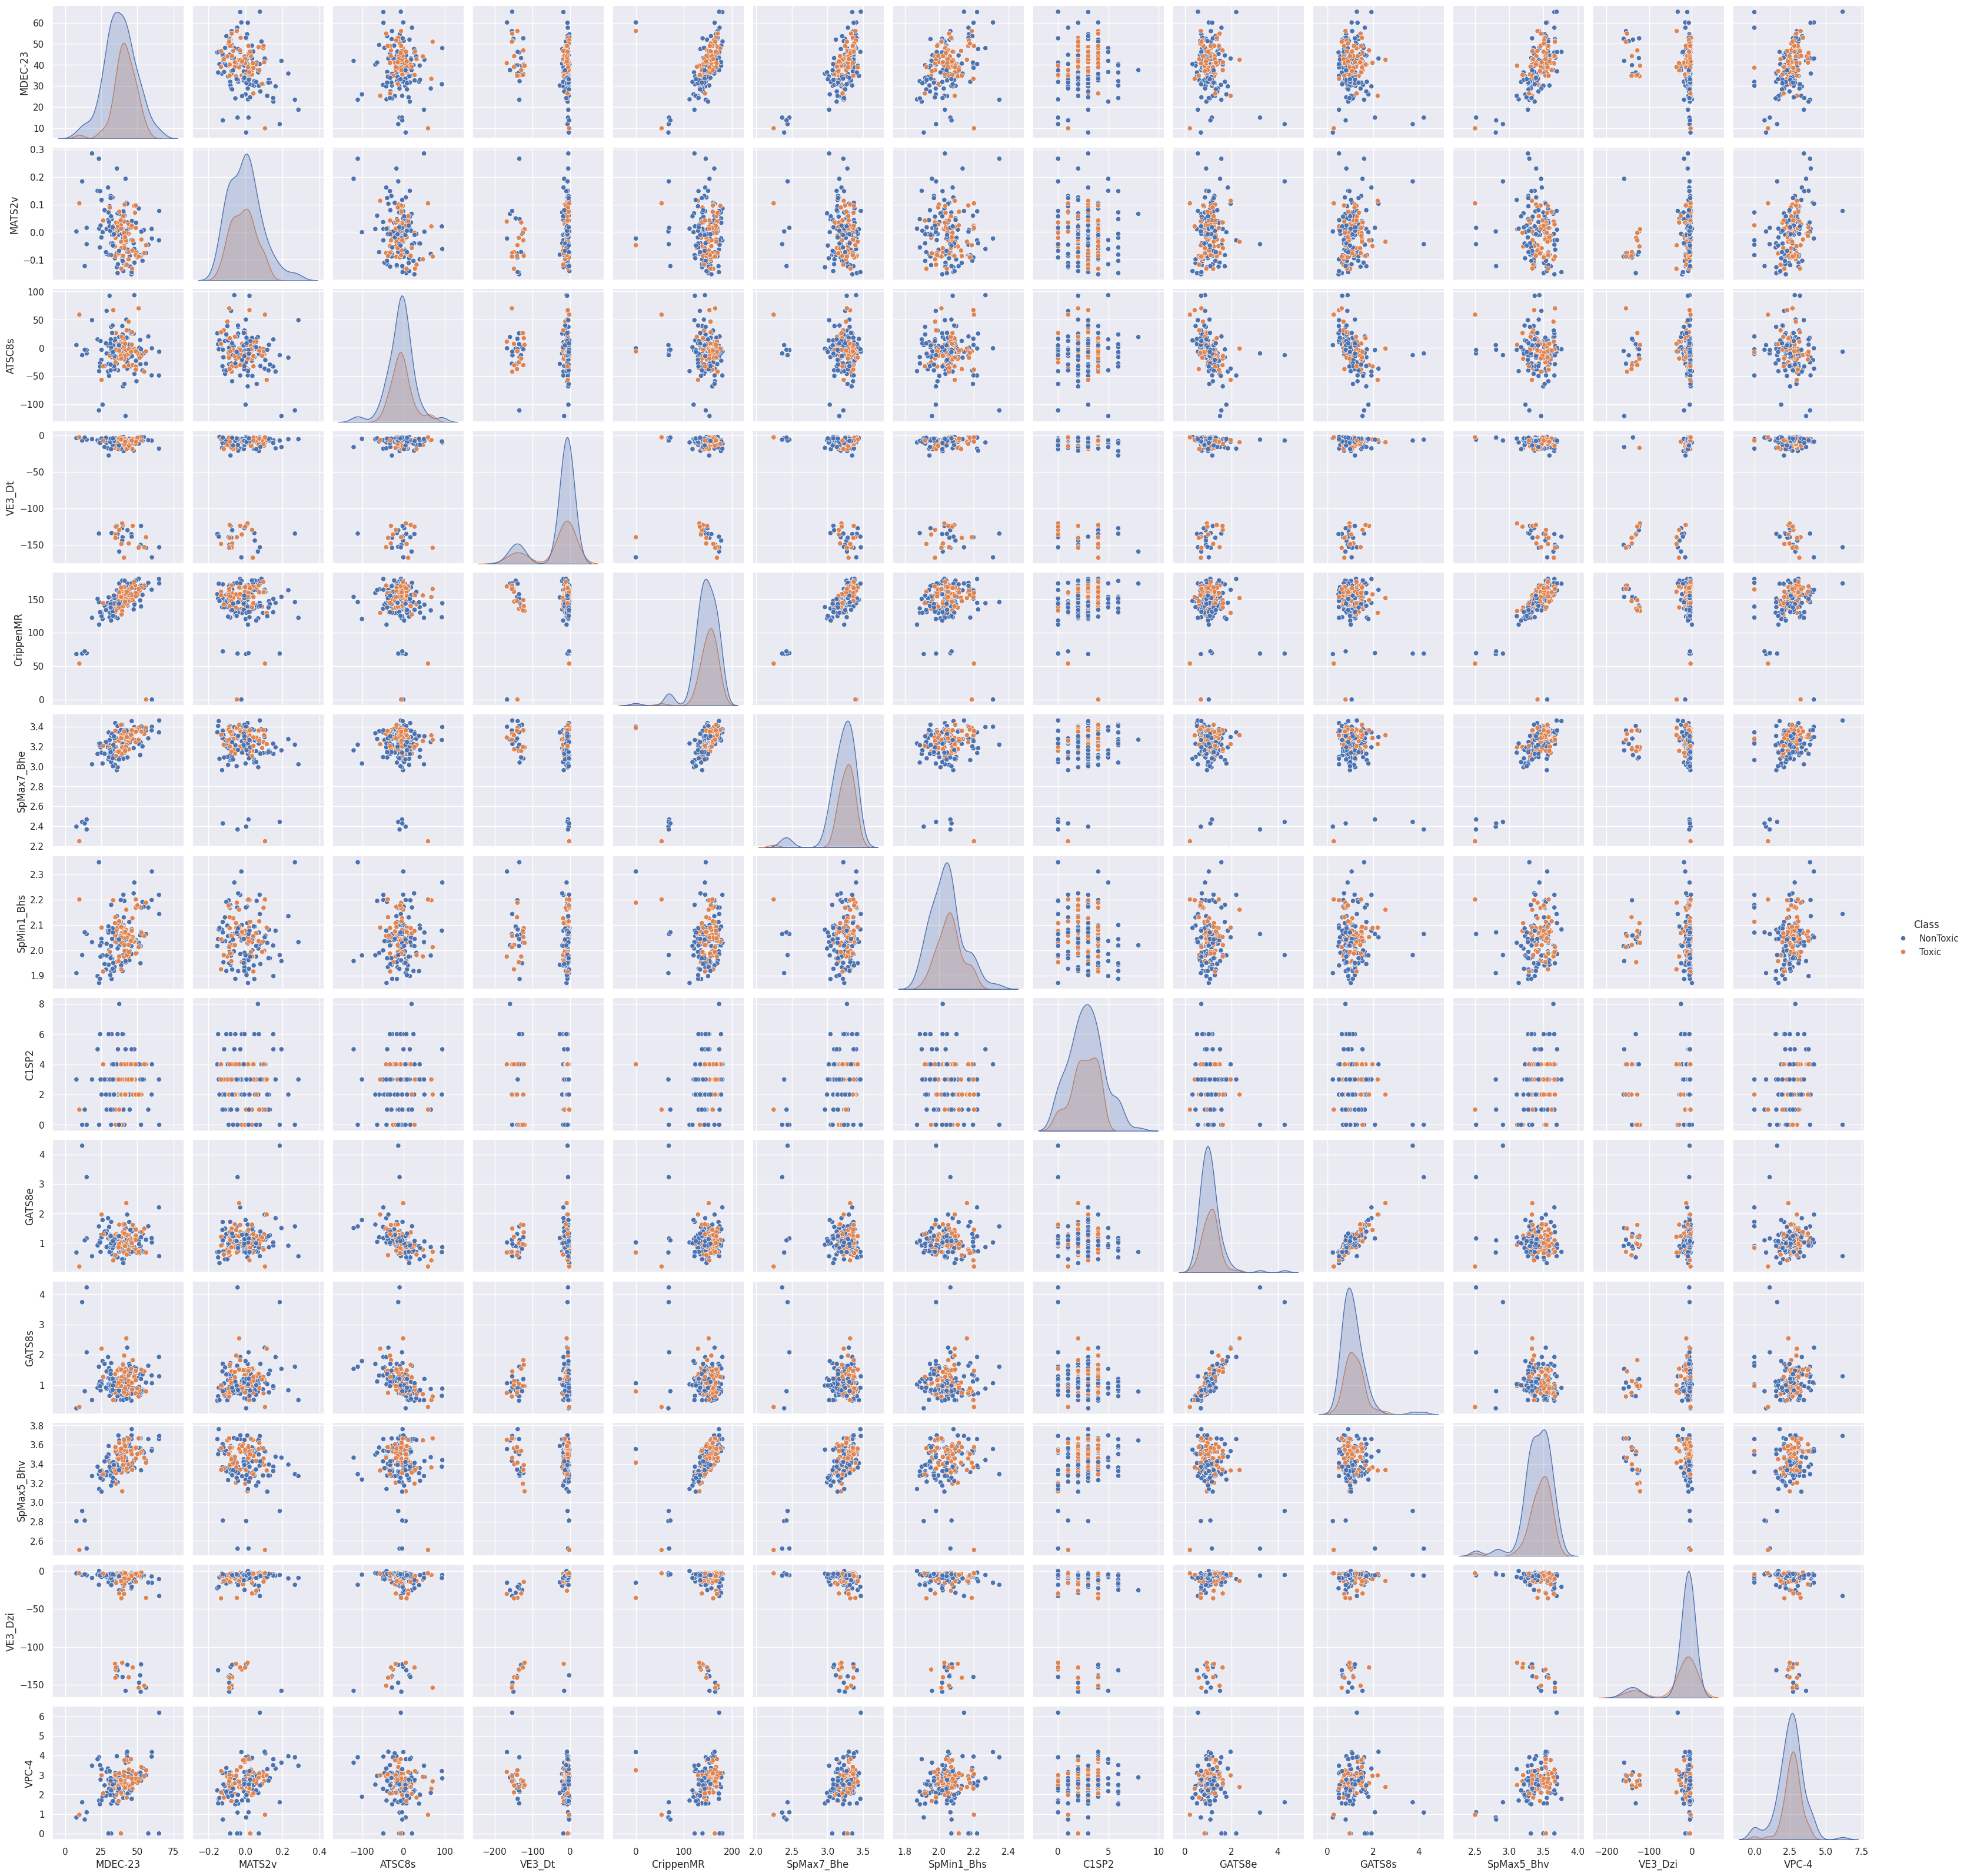

In [29]:
# Парная диаграмма для каждого из показателей!!!
seaborn.pairplot(toxicity, kind='scatter', hue='Class');

Выводим рассеивание частиц в зависимости от других частиц. Иллюстрирует, что показатели могут зависеть друг от друга.

## Нормализация

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

1. Мин-макс нормализация преобразует каждое значение данных в значение от 0 до 1

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

2. Средняя нормализация масштабирует значения таким образом, чтобы среднее значение всех значений было равно 0, а стандартное отклонение (дисперсия) -  1.

$$x_{norm}=\frac{x-x_{mean}}{x_{std}}$$

Проведем нормализацию значений возраста и стоимости билета.
Нормализацию можно провести вручную с использованием приведенных выше формул, а можно воспользоваться инструментами библиотеки `scikit-learn.preprocessing`

Для разных моделей нужна разная нормализация: для метрических моделей (например, KNN) нужна минимакс нормализация, а для линейных (например, SVM) z-нормализация (стандартизация). https://scikit-learn.org/stable/modules/preprocessing.html

И снова построим график зависимости.

In [70]:
from sklearn.preprocessing import MinMaxScaler  # Стандартный мастшабировщик

scaler = MinMaxScaler();
toxicity[['MDEC-23-MM', 'C1SP2-MM']] = scaler.fit_transform(toxicity[['MDEC-23', 'C1SP2']]);
toxicity.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class,MDEC-23-GB,MDEC-23-MM,C1SP2-MM
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic,"(50.907, 65.256]",0.911485,0.50
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic,"(43.733, 50.907]",0.638418,0.25
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic,"(36.559, 43.733]",0.517252,1.00
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic,"(36.559, 43.733]",0.570290,0.75
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic,"(50.907, 65.256]",0.781832,0.25


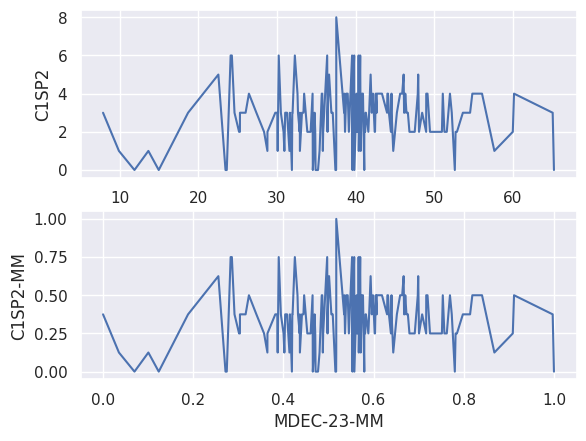

In [71]:
# Проверка, остались ли такие же значения
_, axis = pyplot.subplots(nrows=2);
seaborn.lineplot(data=toxicity, x='MDEC-23', y='C1SP2', ax=axis[0]);
seaborn.lineplot(data=toxicity, x='MDEC-23-MM', y='C1SP2-MM', ax=axis[1]);

Графики идентичны, а значит, что показатели свой смысл жизни не потеряли. Остаётся лишь позавидовать.

## Кодирование категориальных признаков

`OrdinalEncoder` и `OneHotEncoder` - часть библиотеки `scikit-learn` в Python и используются для преобразования категориальных или текстовых признаков в числа, которые предсказательные модели понимают лучше.

`sklearn.preprocessing.OrdinalEncoder` раздает категориальным признакам значения от 0 до $n$, где $n$ - это количество различных значений в данном столбце. Это может быть неправильно, так как может запутать модель машинного обучения, наложив на значения числовой порядок.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Имело бы смысл указать поля, если бы они были нечисловыми!!!
ordinal_fields = [ ];
oneshot_fields = [ 'Class' ];

ordinal = OrdinalEncoder();
toxicity[ordinal_fields] = ordinal.fit_transform(toxicity[ordinal_fields]);
toxicity.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class,MDEC-23-GB,MDEC-23-MM,C1SP2-MM
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic,"(50.907, 65.256]",0.911485,0.50
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic,"(43.733, 50.907]",0.638418,0.25
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic,"(36.559, 43.733]",0.517252,1.00
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic,"(36.559, 43.733]",0.570290,0.75
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic,"(50.907, 65.256]",0.781832,0.25


In [73]:
# Категории преобразований в числа
ordinal.categories_

[]

Итак, главный недостаток `OrdinalEncoder`'a — создание избыточных зависимостей в данных.

Не удивительно, почему мы решили оставить единственный нечисловой показатель для другого кодировщика.

Если это критично, то лучше использовать `sklearn.preprocessing.OneHotEncoder`

https://scikit-learn.org//stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [74]:
from sklearn.preprocessing import OneHotEncoder

# Аналогично...
oneshot = OneHotEncoder();
ose = oneshot.fit_transform(toxicity[oneshot_fields]);
oneshot.categories_

[array(['NonToxic', 'Toxic'], dtype=object)]

In [75]:
# Если показатели существуют, чтобы в ошибку не падало...
if (len(oneshot_fields) > 0):
  print(oneshot.categories_[0]);

['NonToxic' 'Toxic']


In [81]:
# Преобразуем в массив пустоту...
ose.toarray();
print(ose[range(0, 5)]);

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0


In [82]:
# Если пустота всё-таки пустая, то мы не обращаемся к первому элементу пустоты, всё просто!
if (len(oneshot_fields) > 0):
  toxicity[oneshot.categories_[0]] = ose.toarray();
toxicity.head()

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4,Class,MDEC-23-GB,MDEC-23-MM,C1SP2-MM,NonToxic,Toxic
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692,NonToxic,"(50.907, 65.256]",0.911485,0.50,1.0,0.0
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821,NonToxic,"(43.733, 50.907]",0.638418,0.25,1.0,0.0
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730,NonToxic,"(36.559, 43.733]",0.517252,1.00,1.0,0.0
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444,NonToxic,"(36.559, 43.733]",0.570290,0.75,1.0,0.0
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469,NonToxic,"(50.907, 65.256]",0.781832,0.25,1.0,0.0


Главный недостаток `OneHotEncoder`'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков.

Для кодирования целевых меток используется `LabelEncoder`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Корреляция - важнейший фактор, лежащий в основе анализа данных. Корреляция показывает, как переменные в наборе данных связаны друг с другом и как они изменяются относительно друг друга. Значение корреляции колеблется от -1 до +1. Нулевая корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

Тепловая карта используется для графического представления значений корреляционной матрицы с разными цветовыми оттенками для разных значений.

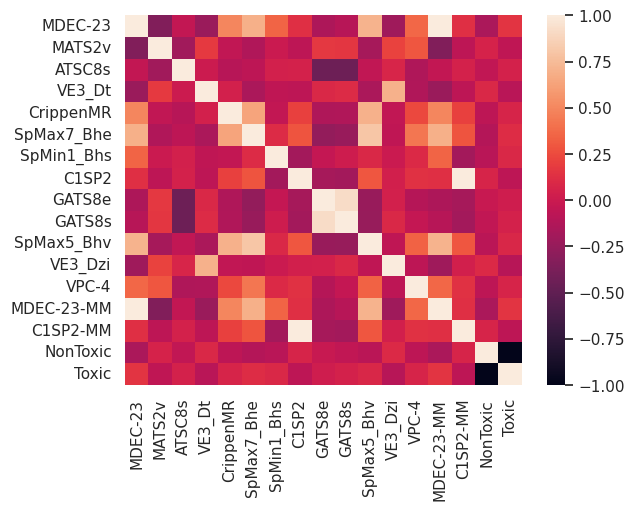

In [83]:
# Тепловая карта, Хищник был бы в восторге)
seaborn.heatmap(toxicity.corr(numeric_only = True));

Показатели больше всего зависят друг от друга, помимо очевидных связей, только в случае 'GATS8e' и 'GATS8s'.
<br>
Больше всего зависят токсичность от нетоксичности))
<br>
В большинстве своём показатели мало зависят друг от друга...

In [84]:
# А почему бы нам не конвертировать всё в ХТМЛ?
!jupyter nbconvert --to html /content/2. Exploratory analysis.ipynb

[NbConvertApp] WARNING | pattern '/content/2.' matched no files
[NbConvertApp] WARNING | pattern 'Exploratory' matched no files
[NbConvertApp] WARNING | pattern 'analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=T